Imports and a Display function Definition

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

def display_results(number, titles, images, row, column):
    plt.figure(figsize=(12, 8))
    for i in range(number):
        plt.subplot(row, column, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i]), plt.axis('off')
    plt.tight_layout()
    plt.show()

Contrast Stretching, Thresholding, Digital Negative, Intensity Level Slicing, and a small example of point operation

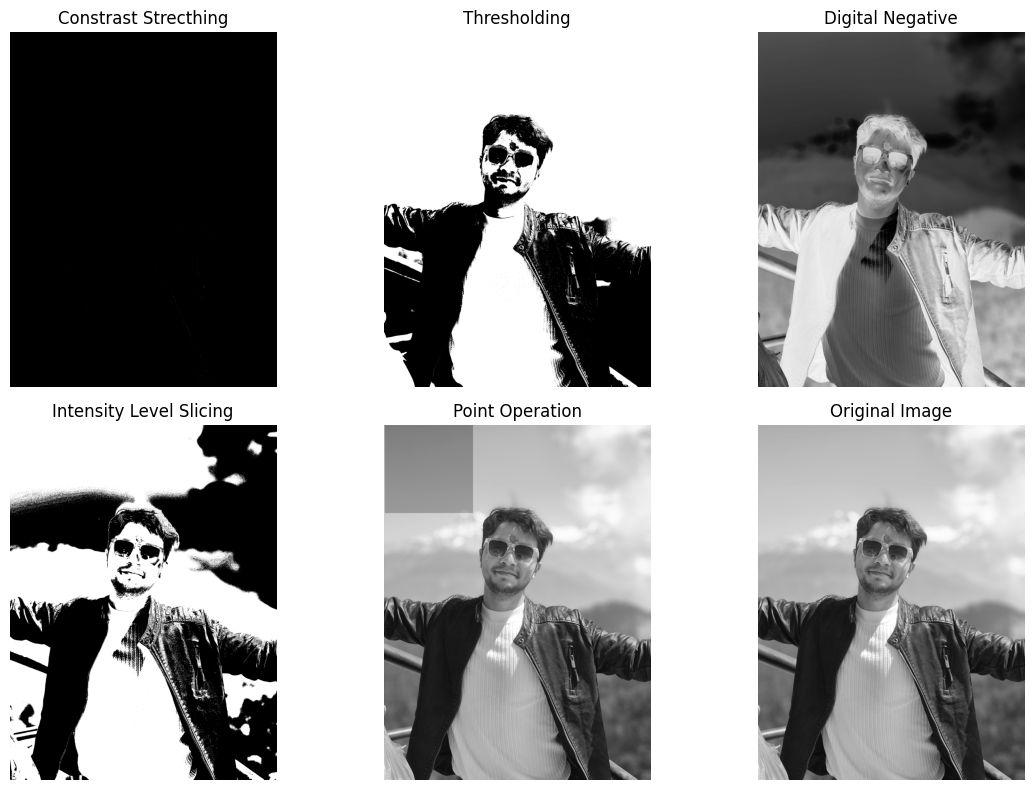

In [2]:
org_img = cv2.imread("photo.jpg", 0)

def point_opt(imgs, point):
    img = imgs.copy()
    img[10:1000,10:1000] = img[10:1000,10:1000] - point
    return img

def constrast_stretch(img):
    min_val = np.min(img)
    max_val = np.max(img)
    return ((img - min_val)* 255 / (max_val- min_val)).astype(np.uint8)

constrast_img = constrast_stretch(org_img)

_, thresh_img = cv2.threshold(org_img, 120, 255, cv2.THRESH_BINARY)

negative_img = 255 - org_img

def intensity_slice(img, min_range=90, max_range=200):
    sliced = img.copy()
    sliced[(img >= min_range) & (img <= max_range)] = 255
    sliced[(img < min_range) | (img > max_range)] = 0
    return sliced

sliced_img = intensity_slice(org_img)

point_opr_img = point_opt(org_img, 50)
imgs = [constrast_img, thresh_img, negative_img, sliced_img, point_opr_img, org_img]
titles = ['Constrast Strecthing', 'Thresholding', 'Digital Negative', 'Intensity Level Slicing', 'Point Operation', 'Original Image']
display_results(6, titles, imgs, 2, 3)

Histogram of an Image

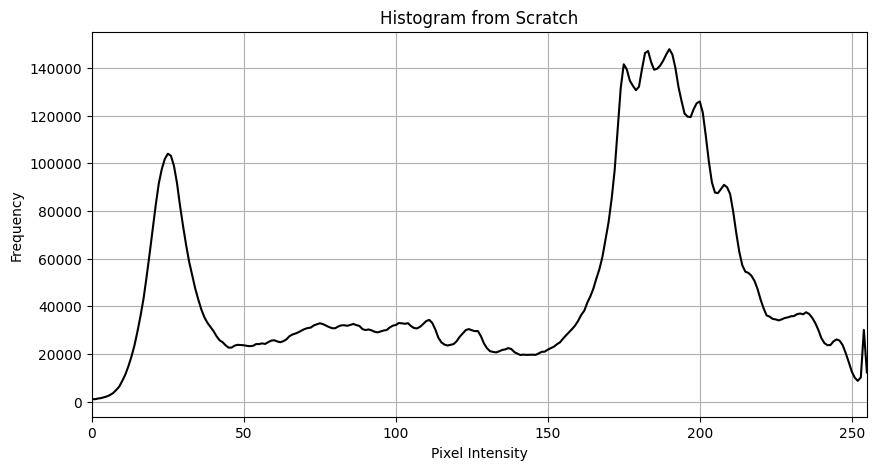

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calc_histogram(img):
    hist = np.zeros(256)
    for pixel in img.ravel():
        hist[pixel] += 1
    return hist

img  = cv2.imread('photo.jpg', cv2.IMREAD_GRAYSCALE)
hist = calc_histogram(img)
plt.figure(figsize=(10,5))
plt.plot(hist, color='black')
plt.title("Histogram from Scratch")
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0,255])
plt.grid()
plt.show()

Histogram Equalization of random generated image and a photo

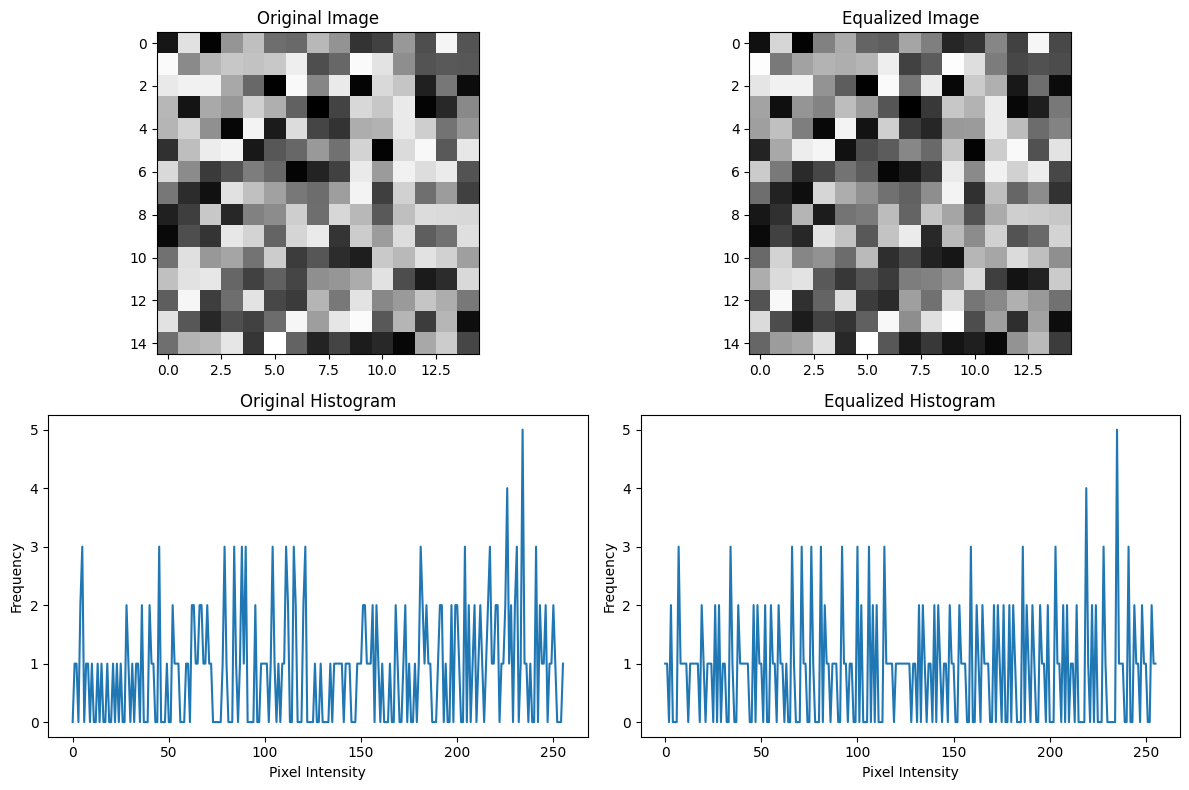

In [4]:
test_image = np.random.randint(0, 256, size=(15, 15), dtype=np.uint8)

equalized = cv2.equalizeHist(test_image)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

ax1.imshow(test_image, cmap='gray')
ax1.set_title('Original Image')
ax2.imshow(equalized, cmap='gray')
ax2.set_title('Equalized Image')

original_hist = calc_histogram(test_image)
equalized_hist = calc_histogram(equalized)

for ax, img, title in [(ax3, original_hist, "Original Histogram"), (ax4, equalized_hist, "Equalized Histogram")]:
    ax.plot(img)
    ax.set_title(title)
    ax.set_xlabel('Pixel Intensity')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

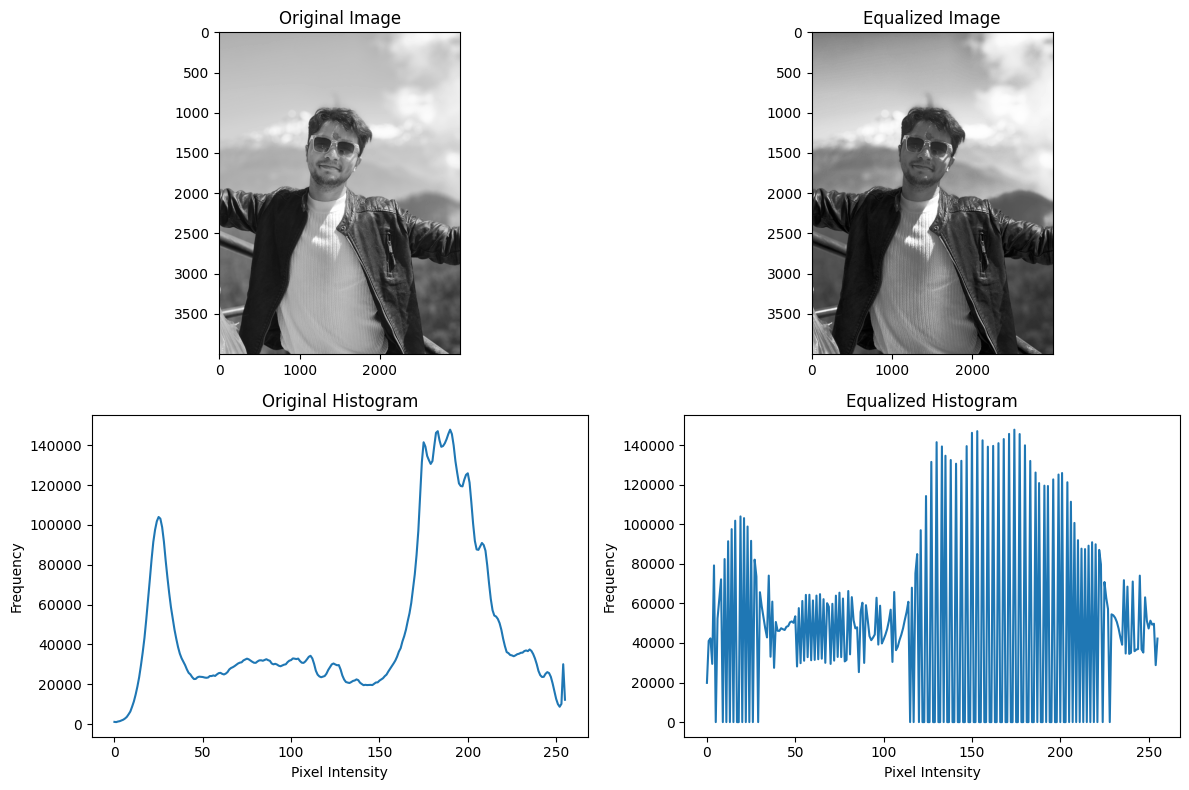

In [6]:
img = cv2.imread('photo.jpg', cv2.IMREAD_GRAYSCALE)
equalized = cv2.equalizeHist(img)

fig, ((ax1, ax2), (ax3, ax4)) =plt.subplots(2, 2, figsize=(12,8))

ax1.imshow(img, cmap='gray')
ax1.set_title("Original Image")
ax2.imshow(equalized, cmap='gray')
ax2.set_title("Equalized Image")

original_hist = calc_histogram(img)
equalized_hist = calc_histogram(equalized)

for ax, img, title in [(ax3, original_hist, "Original Histogram"), (ax4, equalized_hist, "Equalized Histogram")]:
    ax.plot(img)
    ax.set_title(title)
    ax.set_xlabel('Pixel Intensity')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Applying Mean. Weighted average, Min, Max and median filters

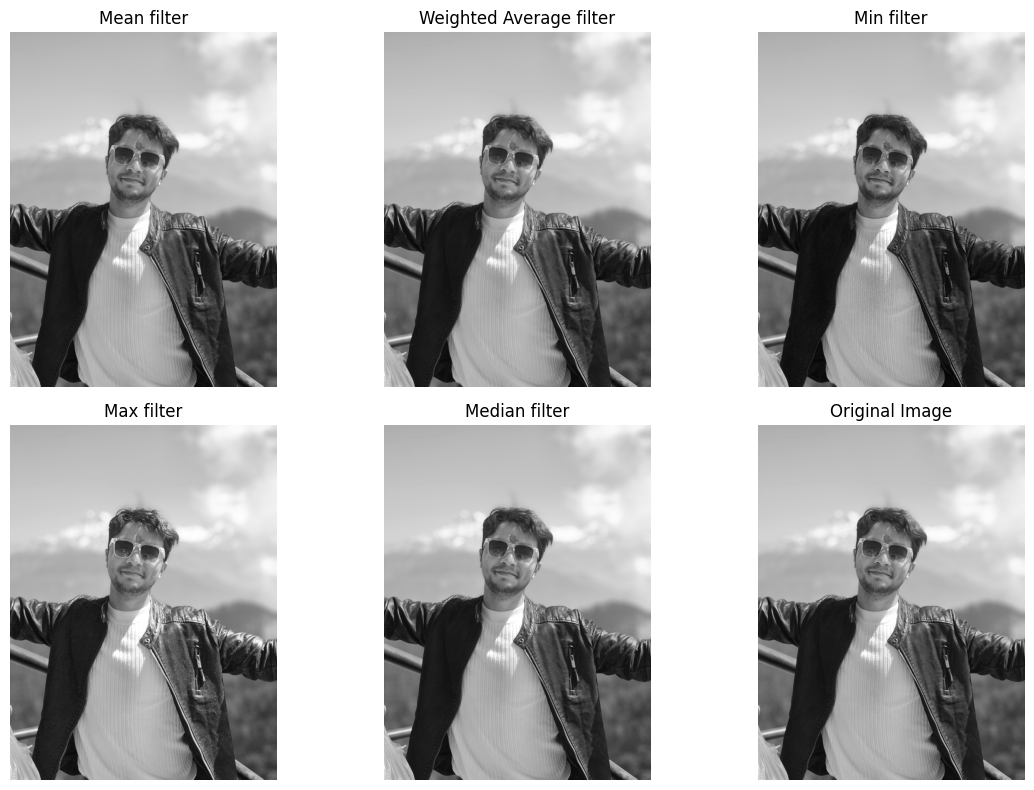

In [8]:
def apply_filters(image, kernel_size = 3, filter = 'mean'):
    padded = np.pad(image, pad_width=kernel_size//2, mode='reflect')
    result = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if filter == 'mean':
                result[i,j] = np.mean(padded[i:i+kernel_size, j:j+kernel_size])
            elif filter == 'min':
                result[i,j] = np.min(padded[i:i+kernel_size, j:j+kernel_size])
            elif filter == 'max':
                result[i,j] = np.max(padded[i:i+kernel_size, j:j+kernel_size])
            elif filter == 'median':
                result[i,j] = np.median(padded[i:i+kernel_size, j:j+kernel_size])
    return result.astype(np.uint8)

def apply_weighted_avg(image, kernel_size=3):
    padded = np.pad(image, pad_width=kernel_size//2, mode='reflect')
    result = np.zeros_like(image)
    #CREATING WEIGHTED KERNEL, CENTER PIXEL HAS HIGHER WEIGHT
    weights = np.ones((kernel_size, kernel_size))
    center = kernel_size//2
    weights[center,center] = 2
    weights = weights / np.sum(weights) #NORMALIZATION OF WEIGHTS
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = padded[i:i+kernel_size, j:j+kernel_size]
            result[i,j] = np.sum(window * weights)
    return result.astype(np.uint8)

img = cv2.imread('photo.jpg', 0)

mean_filter = apply_filters(img)
weighted_avg_filter = apply_weighted_avg(img)
min_filter = apply_filters(img, 3, 'min')
max_filter = apply_filters(img, 3, 'max')
median_filter = apply_filters(img, 3, 'median')

imgs = [mean_filter, weighted_avg_filter, min_filter, max_filter, median_filter, img]
titles = ["Mean filter", "Weighted Average filter", "Min filter", "Max filter", "Median filter", "Original Image"]
display_results(6, titles, imgs, 2, 3)

Applying Laplacian, Sobel and Prewitt filters

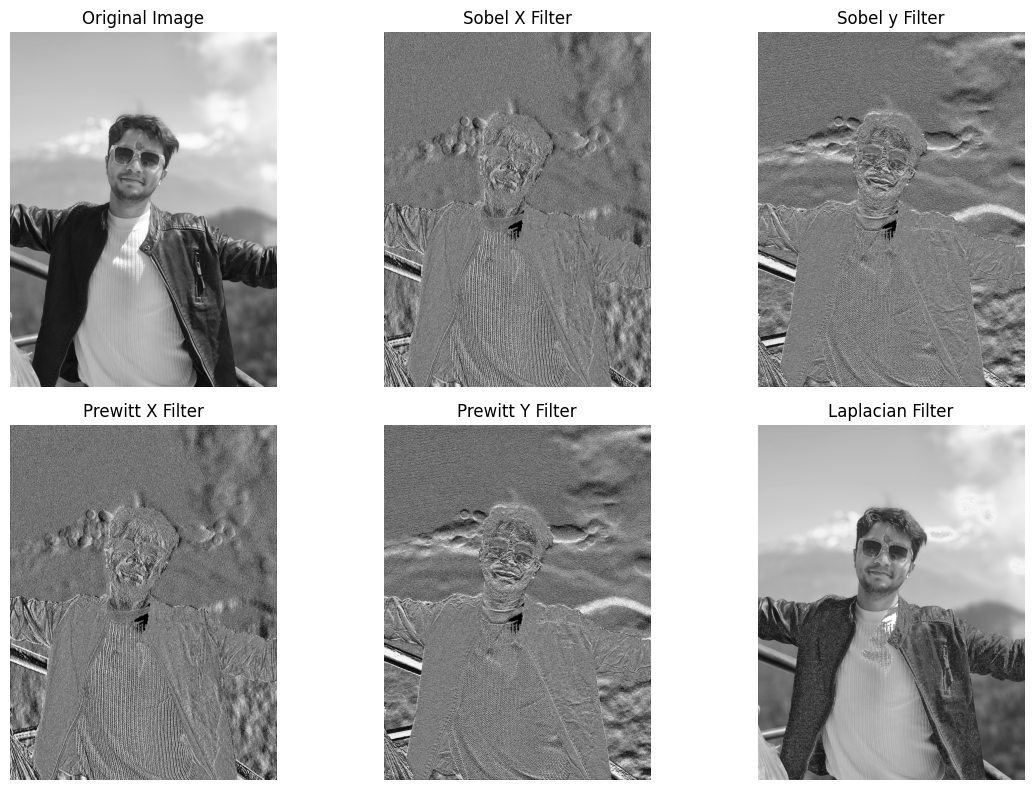

In [9]:
laplace_kernel = np.array([[0, 1, 0],
                    [1, -4, 1],
                    [0, 1, 0]])
sobel_x = np.array([[-1, 0 ,1],
                    [-2, 0, 2],
                    [-1, 0 , 1]])
sobel_y = np.array([[-1, -2, -1],
                    [0, 0 ,0],
                    [1, 2, 1]])
prewitt_x = np.array([[-1, 0 ,1],
                    [-1, 0, 1],
                    [-1, 0 , 1]])
prewitt_y = np.array([[-1, -1, -1],
                    [0, 0 ,0],
                    [1, 1, 1]])

def apply_filter(image, filter, kind):
    padded = np.pad(image, pad_width=1, mode='reflect')
    result = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            result[i,j] = np.sum(padded[i:i+3, j:j+3]*filter)
    if kind == 'laplacian':
        return image - result
    else:
        return result.astype(np.uint8)

sobel_filter_x, sobel_filter_y = apply_filter(img, sobel_x, 'sobel'), apply_filter(img, sobel_y, 'sobel')
prewitt_filter_x, prewitt_filter_y = apply_filter(img, prewitt_x, 'prewitt'), apply_filter(img, prewitt_y, 'prewitt')
laplacian = apply_filter(img, laplace_kernel, 'laplacian')

imgs = [img, sobel_filter_x, sobel_filter_y, prewitt_filter_x, prewitt_filter_y, laplacian]
titles = ["Original Image", "Sobel X Filter", "Sobel y Filter", "Prewitt X Filter", "Prewitt Y Filter", "Laplacian Filter"]
display_results(6, titles, imgs, 2, 3)

Zooming by Replication and Interpolation

Shape of replicated image:  (10, 10)
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  74.   0. 127.   0.  74.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0. 127.   0. 255.   0. 127.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  74.   0. 127.   0.  74.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]
----------------------------------------------------------------------------------------------------
[[  0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.   37.   74.  100.5 127.  100.5  74.   37.    0.    0. ]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.   63.5 127.  191.  255.  191.  127.   63.5   0.    0. ]
 [  0.    0.    

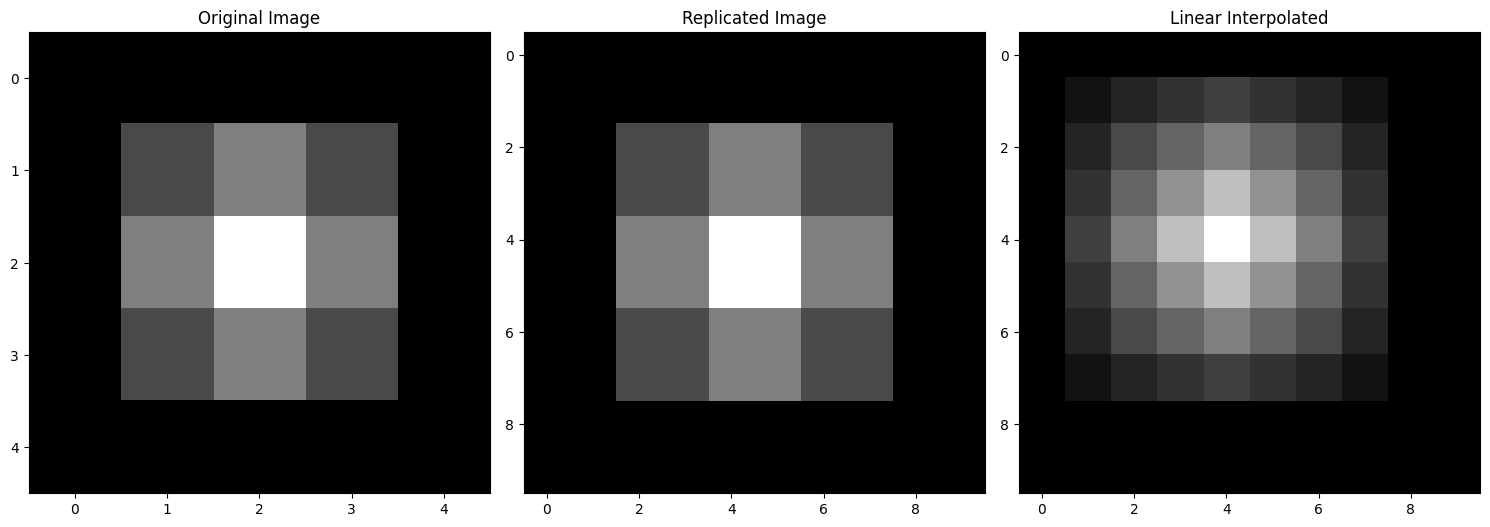

In [10]:
def create_img(size=5):
    x = np.linspace(-1,1,size)
    y = np.linspace(-1,1,size)
    X, Y = np.meshgrid(x, y)
    R = np.sqrt(X**2 + Y**2)
    return (255 * (1 - R)).clip(0,255).astype(np.uint8)

img = create_img()

def zoom_replication(image, scale_factor):
    row_zoom = np.repeat(image, scale_factor, axis=1)
    full_zoom = np.repeat(row_zoom, scale_factor, axis=0)
    return full_zoom

def zoom_interpolation(image):
    h, w = image.shape
    new_h, new_w = 2*h, 2*w
    output = np.zeros((new_h, new_w), dtype=float)

    for i in range(h):
       for j in range(w):
          output[2*i, 2*j] = image[i, j]
    print(output)
    print("-"*100)

    for i in range(0, new_h, 2):
       for j in range(1, new_w, 2):
          left = output[i, j-1]
          right = output[i, j+1] if j+1 < new_w else 0
          output[i, j] = (left + right) / 2
    print(output)
    print("-"*100)

    for i in range(1, new_h, 2):
       for j in range(new_w):
          top = output[i-1, j]
          bottom = output[i+1, j] if i+1 < new_h else 0
          output[i, j] = (top + bottom)/2
    print(output)
    return output

scale_factor = 2
replicated = zoom_replication(img, scale_factor)
print("Shape of replicated image: ", replicated.shape)
interpolated = zoom_interpolation(img)
print("Shape of interpolated image: ", interpolated.shape)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.imshow(img, cmap='gray')
ax1.set_title('Original Image')
ax2.imshow(replicated, cmap='gray')
ax2.set_title('Replicated Image')
ax3.imshow(interpolated, cmap='gray')
ax3.set_title('Linear Interpolated')
plt.tight_layout()
plt.show()